# King Country Real Estate Pricing

## Import and data overview

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import norm
import math
%matplotlib inline
pd.options.display.max_rows = 100
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point, Polygon
from descartes import PolygonPatch

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

In [14]:
def col_rename(df, dict_rules, ip=True):
    ''' rename columns in data frame using a dictionary of rules  '''
    if isinstance(df,pd.core.frame.DataFrame) and isinstance(dict_rules,dict):
        z = df.rename(columns = dict_rules, inplace=ip)
    else:
        raise TypeError
    return z
#
def print_unique(df,col):
    ''' gives a list of unique values in a field '''
    if isinstance(df,pd.core.frame.DataFrame) and isinstance(df[col],pd.core.frame.Series):
        z = df[col].unique()
    else:
        raise TypeError
    return z
#

In [15]:
df = pd.read_csv('kc_house_data.csv') # read the housing data
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Check for nan values

In [17]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [18]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Value counts for all columns

The label takes care of identifications so we can remove 'id'. We also chose to remove date sold and year renovated.

In [19]:
df.drop(labels=['id','date','yr_renovated'],axis=1,inplace=True) # drop

In [20]:

!pwd

/Users/sunitachand/Documents/GitHub/SUNITA-CHAND/kingcounty


In [21]:
df['price'].mean()

540088.1417665294

## Price variation across region

In [22]:
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & (df['price'] <= np.percentile(df['price'], 99.5)) & (df['lat'] >= np.percentile(df['lat'], 0.05)) &  (df['lat'] < np.percentile(df['lat'], 99.95)) &(df['long'] >= np.percentile(df['long'], 0.05)) &(df['long'] <= np.percentile(df['long'], 99.95))]

In [23]:
df['price_sqft'] = df['price']/df['sqft_living']

/var/folders/yt/c_jv09mj0ds2ks2kd4b9zhpm0000gq/T/ipykernel_92609/4229130723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_sqft'] = df['price']/df['sqft_living']


In [24]:
KCo_map = gpd.read_file('King_County_Political_Boundary_no_waterbodies__kingco_area.shp')
KCo_map.set_crs(epsg=4326, inplace=True)
#crs = {'init':'espc:4326'}
#crs=CRS("epsg:3857")
#KCo_map = KCo_map.to_crs(crs)
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, geometry = geometry)


DriverError: King_County_Political_Boundary_no_waterbodies__kingco_area.shp: No such file or directory

In [25]:
df.lat.min()-.01

47.174

NameError: name 'KCo_map' is not defined

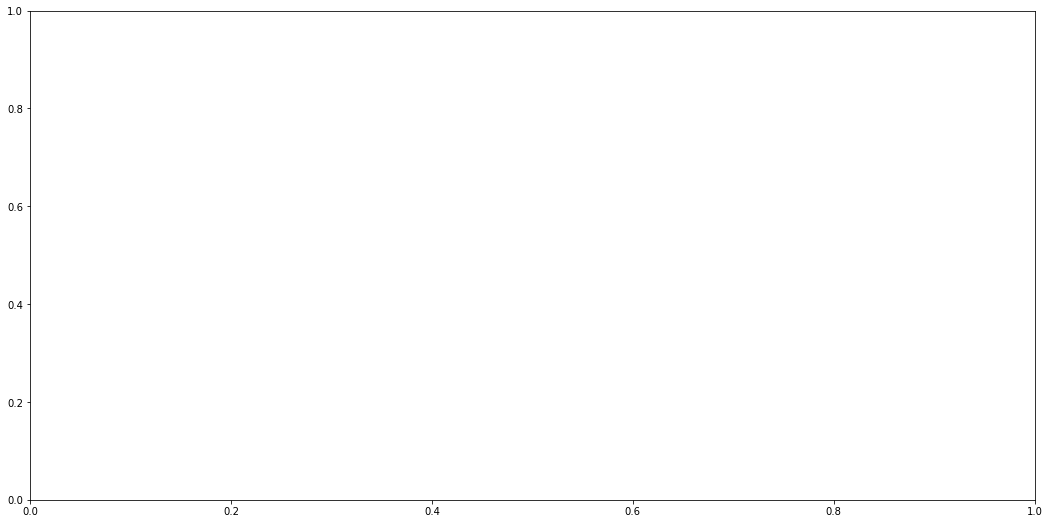

In [26]:
fig, ax = plt.subplots(figsize=(18,9))
KCo_map.plot(ax=ax, alpha=0.7,color='grey')
geo_df.plot(column=df['price_sqft'],ax=ax,alpha=0.25, legend=True,markersize=20)
plt.title('King County Housing Data - Geographical Distribution Across King County, \
          WA \n By Price per Square Foot', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(df.long.min()-.01,df.long.max()-.25)
plt.ylim(df.lat.min()-.01, df.lat.max()+.01)

plt.show()

In [27]:
df_zbp = df.groupby('zipcode')['price'].agg('mean').reset_index()

In [28]:
df_zbp

,zipcode,price
0,98001,2.840966e+05
1,98002,2.379558e+05
2,98003,2.947067e+05
3,98004,1.223358e+06
4,98005,8.101649e+05
5,98006,8.294848e+05
6,98007,6.171051e+05
7,98008,5.990417e+05
8,98010,4.236660e+05
9,98011,4.903515e+05


In [29]:
N=round(df_zbp['price'].max() - df_zbp['price'].min(),0)
N = int(N)

In [30]:
bins = [int(N/(4-i)) for i in range(4)]
bins.insert(0,0)
bins

[0, 337922, 450563, 675845, 1351691]

In [31]:
df_zbp['binned'] = pd.cut(df_zbp['price'], bins)

In [32]:
df['price_sqft'].mean()

263.2391467227264

In [33]:
df_zbp

,zipcode,price,binned
0,98001,2.840966e+05,"(0.0, 337922.0]"
1,98002,2.379558e+05,"(0.0, 337922.0]"
2,98003,2.947067e+05,"(0.0, 337922.0]"
3,98004,1.223358e+06,"(675845.0, 1351691.0]"
4,98005,8.101649e+05,"(675845.0, 1351691.0]"
5,98006,8.294848e+05,"(675845.0, 1351691.0]"
6,98007,6.171051e+05,"(450563.0, 675845.0]"
7,98008,5.990417e+05,"(450563.0, 675845.0]"
8,98010,4.236660e+05,"(337922.0, 450563.0]"
9,98011,4.903515e+05,"(450563.0, 675845.0]"


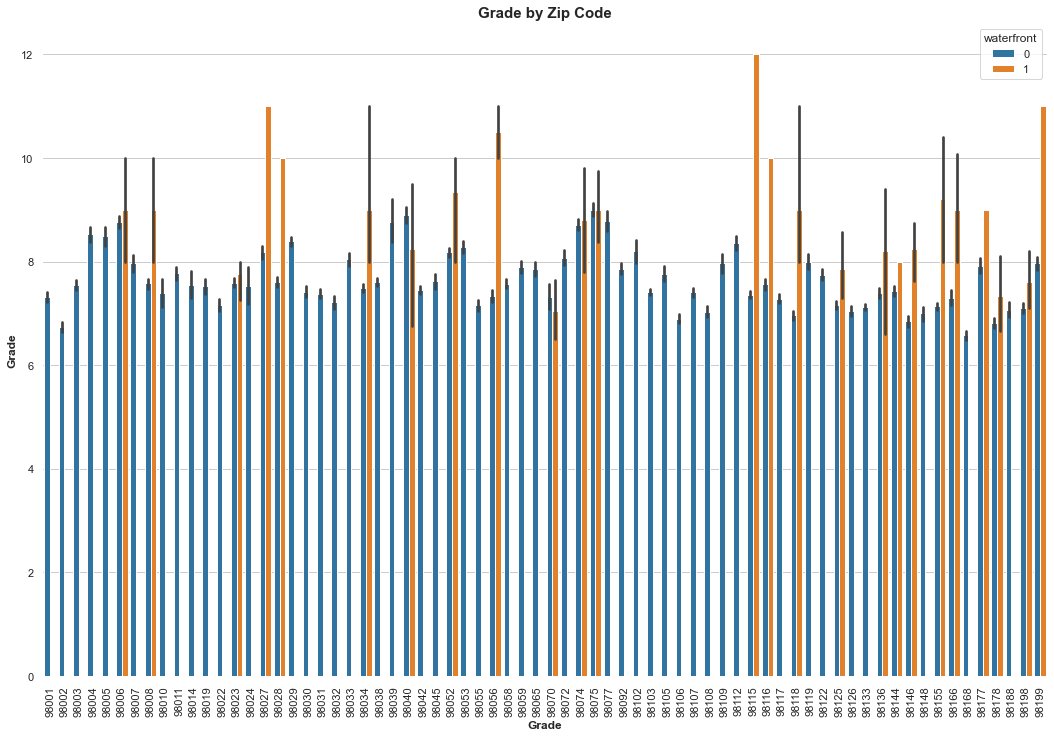

In [34]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("bright")

f, ax = plt.subplots(figsize=(18, 12))
sns.despine(f, left=True, bottom=True)
sns.barplot(x="zipcode", y="grade", data=df, ax=ax, hue='waterfront')
ax.set_title("Grade by Zip Code", fontsize=15,fontweight='bold')
ax.set_xlabel("Grade", fontsize=12,fontweight='bold')
ax.set_ylabel("Grade", fontsize=12,fontweight='bold')
plt.xticks(rotation=90)

plt.show()

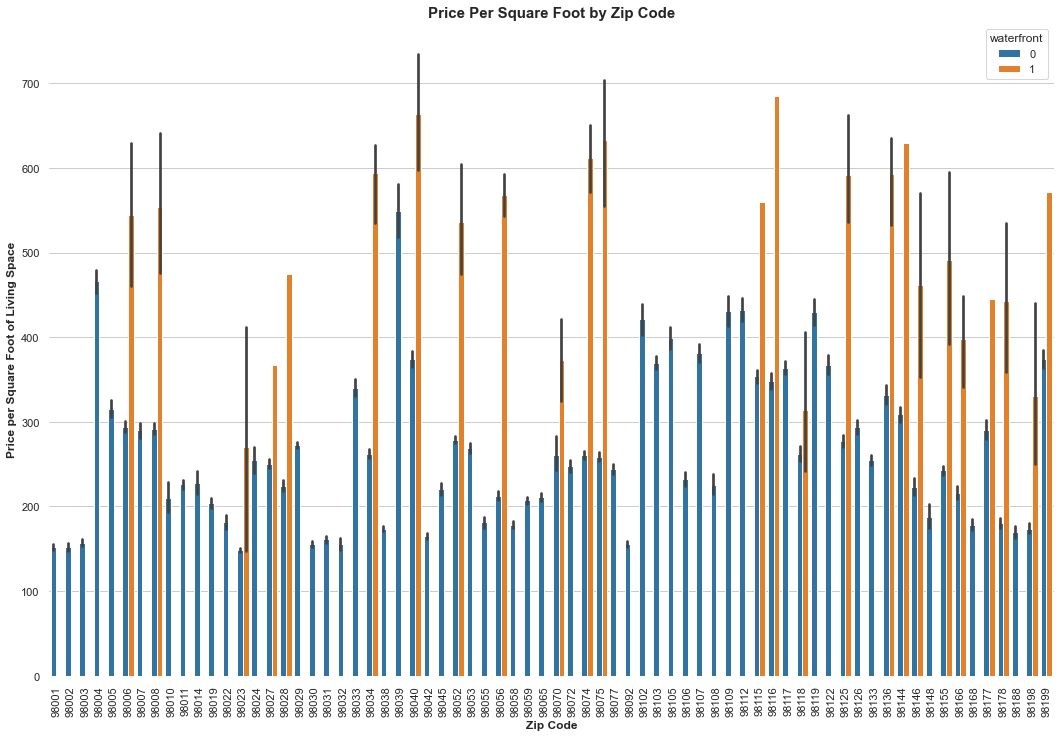

In [35]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("bright")

f, ax = plt.subplots(figsize=(18, 12))
sns.despine(f, left=True, bottom=True)
sns.barplot(x="zipcode", y="price_sqft", data=df, ax=ax, hue='waterfront')
ax.set_title("Price Per Square Foot by Zip Code", fontsize=15,fontweight='bold')
ax.set_xlabel("Zip Code", fontsize=12,fontweight='bold')
ax.set_ylabel("Price per Square Foot of Living Space", fontsize=12,fontweight='bold')
plt.xticks(rotation=90)

plt.show()

In [36]:
# find the row of the house which has the highest price
#maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
#folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
 #             icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

In [37]:
df.drop(columns = ['lat', 'long', 'geometry', 'price_sqft'], inplace = True)


KeyError: "['geometry'] not found in axis"

## Correlations and statistics

In [ ]:
for col in df.columns:  
    print(col, '\n', pd.concat([df[col].value_counts(normalize=True).head(20), df[col].value_counts().head(20)],axis=1,keys=('fractional %','count')),
    '\n Min:', df[col].min(), '  Max:', df[col].max(), 
    'Unique Values:', df[col].nunique(),'\n')

In [ ]:
perc_more_with_water = 1661876/531564
perc_more_with_water

In [ ]:
 531564 *(1+ perc_more_with_water)

In [ ]:
df.describe()

In [ ]:
features = ['price', 'sqft_above','sqft_basement', 'sqft_lot', 'sqft_living15','sqft_lot15', 'sqft_living',
            'bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','zipcode']
#['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
   #    'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
   #    'sqft_living15', 'sqft_lot15', 'waterfront']

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
corrm=df[features].corr()
corrm

In [ ]:
corrm['price'].sort_values()

In [ ]:
mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(20, 14))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.2,vmax=1.5,square=True, cmap="BuGn_r",
            linecolor='w',annot=True,annot_kws={"size":12},mask=mask,cbar_kws={"shrink": .9});

 - sqft_living and sqft_above display a multicolinearity, having a Pearson correlation of 0.88. 
 - To a lesser extent, there was some multicollinearity between sqft_living and sqft_living15 (between the living space of the house in question and the 15 closest neighbors), as well as sqft_living and grade (0.77) and sqft_above and grade (0.76). 


In [ ]:
sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                 'sqft_living15', 'sqft_lot15']])
plt.show()

sqft_lot and sqft_lot15 are not correlted linearly with price

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y = df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y = df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms', ylabel='Price');

In [ ]:
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)

In [ ]:
#limit dataset remove outliers
df = df.loc[df['bedrooms'] < 7.0]
df = df.loc[df['bathrooms'] > 1.0]
df = df.loc[df['floors'] < 3]
df = df.loc[df['sqft_basement'] < 2000]
df = df.loc[df['sqft_lot'] < 750000]

In [ ]:
plt.hist('sqft_living',data=df,bins=5)

## Distribution plot and histograms

In [ ]:
sns.distplot((df['sqft_living']), bins=20)

In [ ]:
sns.distplot((df['sqft_living15']), bins=20)

In [ ]:
sns.distplot((df['yr_built']), bins=20)

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=3,figsize=(15,15))

for i, ax in zip(range(9), axes.flat):
    sns.distplot(df[features[i]], ax=ax, kde=True)
plt.show()

In [ ]:
# histogram on price: 
price_hist = plt.figure(num=1, figsize=(8,8))
ax = price_hist.add_subplot(111)
ax.hist(df['price'], bins = 40, density = True, alpha = 0.5)
plt.show()


There is a upper ended tail to the normal distribution for price

In [ ]:
sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_basement']])
plt.show()

## Data transformations

In [ ]:
df = df.loc[df['price'] > 100000]
df = df.loc[df['price'] < 1200000]
df.describe() 
#Repeat histogram on price: 
price_hist = plt.figure(num=1, figsize=(8,8))
ax = price_hist.add_subplot(111)
ax.hist(df['price'], bins = 40, density = True, alpha = 0.5)
plt.show()

In [ ]:
pt = PowerTransformer()
sqft_living_transformed=pt.fit_transform(df['sqft_living'].to_numpy().reshape(-1,1))
sns.displot(sqft_living_transformed)

In [ ]:
sns.displot(df['sqft_living'])

In [ ]:
sqft_living15_transformed=pt.fit_transform(df['sqft_living15'].to_numpy().reshape(-1,1))
sns.displot(sqft_living_transformed)

In [ ]:
df['sqft_living_transformed'] = sqft_living_transformed

In [ ]:
type(df['sqft_living_transformed'])

In [ ]:
df['log_sqft_lot'] = df['sqft_lot'].copy()
df['log_sqft_lot'] = df['log_sqft_lot'].map(lambda x: np.log(x))

In [ ]:
sns.pairplot(df[['price', 'log_sqft_lot']])
plt.show()

In [ ]:
sns.pairplot(df[['price', 'sqft_living']])
plt.show()

In [ ]:
#df['sqft_basement_t'] = df['sqft_basement'].copy()
#df['sqft_basement_t'] = df['sqft_basement_t'].map(lambda x: x < 2000)

In [ ]:
sns.pairplot(df[['price', 'sqft_basement']])
plt.show()

In [ ]:
sns.pairplot(df[['price', 'sqft_living_transformed']])
plt.show()

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df[['price', 'bedrooms', 'sqft_living_transformed', 'log_sqft_lot', 'floors',
       'condition', 'sqft_basement', 'yr_built', 'waterfront']].corr()



In [ ]:
plt.subplots(figsize=(17,15))
sns.heatmap(df[['price', 'bedrooms', 'sqft_living_transformed', 'log_sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'waterfront']].corr(), 
        center=0,annot=True, cmap='coolwarm')
plt.show()

## Modeling

In [38]:
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True)

df = df.drop(['zipcode'], axis=1)
df = pd.concat([df, zipcode_dummies], axis=1)


In [39]:
y = df.price
features = df.drop(['price','sqft_living','sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above'], axis = 1)
X = features
X

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,lat,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,3,1.00,1.0,0,0,3,7,0,1955,47.5112,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2.0,0,0,3,7,400,1951,47.7210,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,1.0,0,0,3,6,0,1933,47.7379,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1.0,0,0,5,7,910,1965,47.5208,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1.0,0,0,3,8,0,1987,47.6168,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,3.0,0,0,3,8,0,2009,47.6993,...,0,0,0,0,0,0,0,0,0,0
21609,4,2.50,2.0,0,0,3,8,0,2014,47.5107,...,1,0,0,0,0,0,0,0,0,0
21610,2,0.75,2.0,0,0,3,7,0,2009,47.5944,...,0,0,0,0,0,0,0,0,0,0
21611,3,2.50,2.0,0,0,3,8,0,2004,47.5345,...,0,0,0,0,0,0,0,0,0,0


In [40]:
formula = 'y ~ bedrooms + bathrooms + floors + waterfront + view + condition  + grade+ sqft_basement  \
            + yr_built  + sqft_living_transformed +  log_sqft_lot + zip_98002 \
            + zip_98003 + zip_98004 + zip_98005 + zip_98006 + zip_98007 + zip_98008 \
            + zip_98010 + zip_98011 + zip_98014 + zip_98019 + zip_98022 + zip_98023 \
            + zip_98024 + zip_98027 + zip_98028 + zip_98029 + zip_98030 + zip_98031 \
            + zip_98032 + zip_98033 + zip_98034 + zip_98038 + zip_98039 + zip_98040 \
            + zip_98042 + zip_98045 + zip_98052 + zip_98053 + zip_98055 + zip_98056 \
            + zip_98058 + zip_98059 + zip_98065 + zip_98070 + zip_98072 + zip_98074 \
            + zip_98075 + zip_98077 + zip_98092 + zip_98102 + zip_98103 + zip_98105 \
            + zip_98106 + zip_98107 + zip_98108 + zip_98109 + zip_98112 + zip_98115 \
            + zip_98116 + zip_98117 + zip_98118 + zip_98119 + zip_98122 + zip_98125 \
            + zip_98126 + zip_98133 + zip_98136 + zip_98144 + zip_98146 + zip_98148 \
            + zip_98155 + zip_98166 + zip_98168 + zip_98177 + zip_98178 + zip_98188 \
            + zip_98198 + zip_98199'
smodel = ols(formula = formula, data = features).fit()
smodel.summary()


PatsyError: Error evaluating factor: NameError: name 'log_sqft_lot' is not defined
    y ~ bedrooms + bathrooms + floors + waterfront + view + condition  + grade+ sqft_basement              + yr_built  + sqft_living_transformed +  log_sqft_lot + zip_98002             + zip_98003 + zip_98004 + zip_98005 + zip_98006 + zip_98007 + zip_98008             + zip_98010 + zip_98011 + zip_98014 + zip_98019 + zip_98022 + zip_98023             + zip_98024 + zip_98027 + zip_98028 + zip_98029 + zip_98030 + zip_98031             + zip_98032 + zip_98033 + zip_98034 + zip_98038 + zip_98039 + zip_98040             + zip_98042 + zip_98045 + zip_98052 + zip_98053 + zip_98055 + zip_98056             + zip_98058 + zip_98059 + zip_98065 + zip_98070 + zip_98072 + zip_98074             + zip_98075 + zip_98077 + zip_98092 + zip_98102 + zip_98103 + zip_98105             + zip_98106 + zip_98107 + zip_98108 + zip_98109 + zip_98112 + zip_98115             + zip_98116 + zip_98117 + zip_98118 + zip_98119 + zip_98122 + zip_98125             + zip_98126 + zip_98133 + zip_98136 + zip_98144 + zip_98146 + zip_98148             + zip_98155 + zip_98166 + zip_98168 + zip_98177 + zip_98178 + zip_98188             + zip_98198 + zip_98199
                                                                                                                                                    ^^^^^^^^^^^^

In [ ]:
#display adjusted R-squared
print(smodel.rsquared_adj)

### Modeling test train split

In [41]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30,random_state=312)

In [42]:
# Scale indepedenent variable
# Standardize features by removing the mean and scaling to unit variance.
std_scaler     = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled  = std_scaler.transform(X_test) # use the same parameters from the training set [same scaling]

In [43]:
print(X_train_scaled.mean(axis=0), " \n", X_train_scaled.std(axis=0))



[-1.90175373e-18  1.25159167e-16 -1.16006977e-16 -3.94613898e-17
 -7.60701490e-18  1.37401707e-16  2.84312182e-16  7.60701490e-18
 -3.39367952e-15  3.12363049e-14  2.13395786e-14  3.18543749e-17
 -3.99368282e-17  4.56420894e-17  0.00000000e+00  2.90017443e-17
 -5.70526118e-18  1.83043796e-17  5.99052424e-17 -1.71157835e-17
 -3.89859514e-17 -8.08245333e-18 -4.08877051e-17  3.09034980e-17
 -1.56894682e-17 -2.73377098e-17 -1.61649067e-17  5.80034886e-17
 -4.56420894e-17 -6.18069961e-18 -9.50876863e-18 -3.13789365e-17
  6.58482228e-17 -4.08877051e-17  4.32648973e-17  1.14105224e-17
  4.99210353e-18  3.75596361e-17 -2.66245522e-17  1.42631529e-17
 -3.57767420e-17  9.50876863e-18  4.65929663e-17  1.33122761e-17
  1.56894682e-17 -1.66403451e-17 -2.88828847e-17 -2.61491137e-17
  1.37877145e-17  2.90017443e-17  3.56578824e-17  2.09192910e-17
 -3.80350745e-18  6.56105035e-17 -4.46912126e-17 -2.66245522e-17
  1.90175373e-18 -1.06973647e-17  2.47227984e-17  4.49289318e-17
  5.75280502e-17  2.65056

In [44]:
model = LinearRegression()           # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [45]:
model.coef_

array([ 3.08430259e+04,  5.96058064e+04,  2.30299936e+04,  1.23218352e+04,
        2.53023025e+04,  4.95666591e+03,  1.29116382e+05,  4.25759946e+04,
       -4.62677401e+04,  2.99002658e+03,  3.46865192e+04,  1.36965056e+05,
        2.40322987e+02, -4.33228966e+03,  3.43862475e+04,  3.37763033e+03,
        4.66948300e+03, -1.69139285e+03, -1.76330778e+03, -1.14806011e+03,
       -1.21127496e+03, -1.91156370e+03, -4.82904436e+03, -6.69053268e+03,
       -3.78961105e+03,  1.86863748e+03, -5.20256568e+03, -1.07907604e+03,
       -6.91992352e+03, -4.18401639e+03, -5.24657489e+03, -2.77933318e+03,
        9.96974584e+03,  5.61861787e+02, -8.42012822e+03,  1.99191464e+04,
        2.00256508e+04, -7.70718662e+03, -1.00587729e+04,  1.53417905e+03,
        8.34917935e+03, -3.80824733e+03, -5.84987453e+02, -7.26766928e+03,
        8.23324953e+02, -4.71466999e+03,  2.16676819e+03, -1.00566166e+03,
       -3.34235855e+03,  7.52864990e+02,  6.76743737e+02, -7.49043508e+03,
        1.69291507e+03, -

In [46]:
y_pred       = model.predict(X_test_scaled)   # model prediction [test]
y_pred_train = model.predict(X_train_scaled)  # model prediction [train]

In [47]:
result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

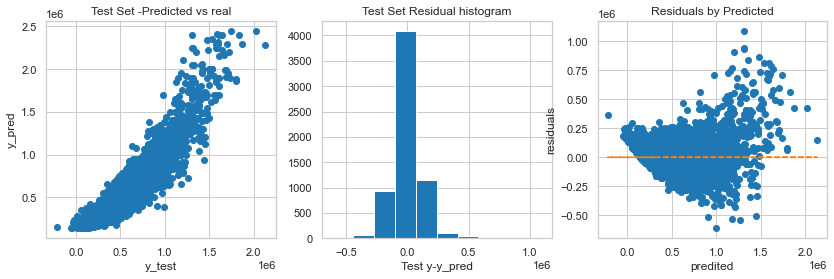

In [48]:

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

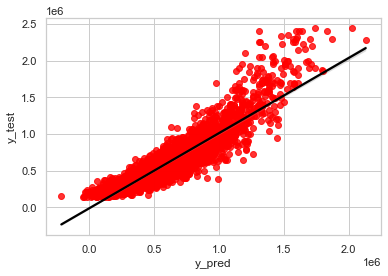

In [49]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Error metrics

In [50]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))
print(mse(y_train,y_pred_train, squared = False))

14922704476.581085
83731.3800112939
121283.74514190729


In [51]:
R2=r2_score(y_test,y_pred)
R2

0.8435974753060852

In [52]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.8415942171624724

#### Feature importance

In [53]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [54]:
features_importances

,Attribute,Importance
11,price_sqft,136965.055701
6,grade,129116.382311
1,bathrooms,59605.806410
8,yr_built,46267.740115
7,sqft_basement,42575.994582
10,long,34686.519212
14,zip_98004,34386.247530
0,bedrooms,30843.025937
4,view,25302.302521
2,floors,23029.993578


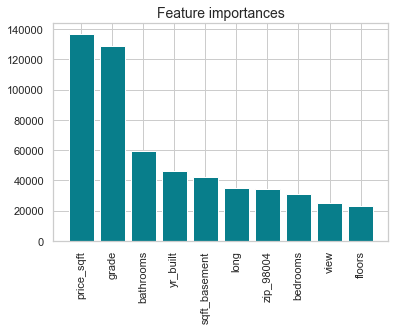

In [55]:
plt.bar(x=features_importances['Attribute'][0:10], height=features_importances['Importance'][0:10], color='#087E8B')
plt.title('Feature importances', size=14)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
df.to_csv('kc_house_data_ext.csv')

In [57]:
grade_avg_price = df.groupby('grade')['grade','price'].agg('mean')

In [58]:
grade_avg_price

,grade,price
grade,,
1,1.0,1.420000e+05
3,3.0,2.710000e+05
4,4.0,2.435674e+05
5,5.0,2.722585e+05
6,6.0,3.072014e+05
7,7.0,4.033514e+05
8,8.0,5.420516e+05
9,9.0,7.715558e+05
10,10.0,1.029192e+06


<AxesSubplot:xlabel='grade', ylabel='price'>

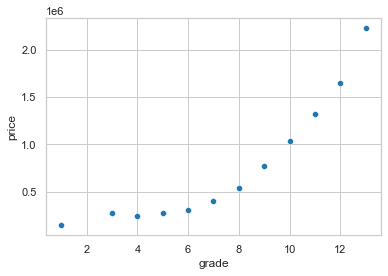

In [59]:

# Draw Seaborn Scatter Plot to find relationship between age and fare
sns.scatterplot(x = grade_avg_price['grade'], y = grade_avg_price['price'])

In [60]:
zip_avg_price = df.groupby('zipcode')['zipcode','price'].agg('mean')

KeyError: 'zipcode'

In [ ]:
zip_avg_price.sort_values(by=['price'], ascending=False)

In [ ]:

# Draw Seaborn Scatter Plot to find relationship between age and fare
sns.barplot(x = zip_avg_price['zipcode'], y = zip_avg_price['price'])

ValueError: Could not interpret input 'zipcode'

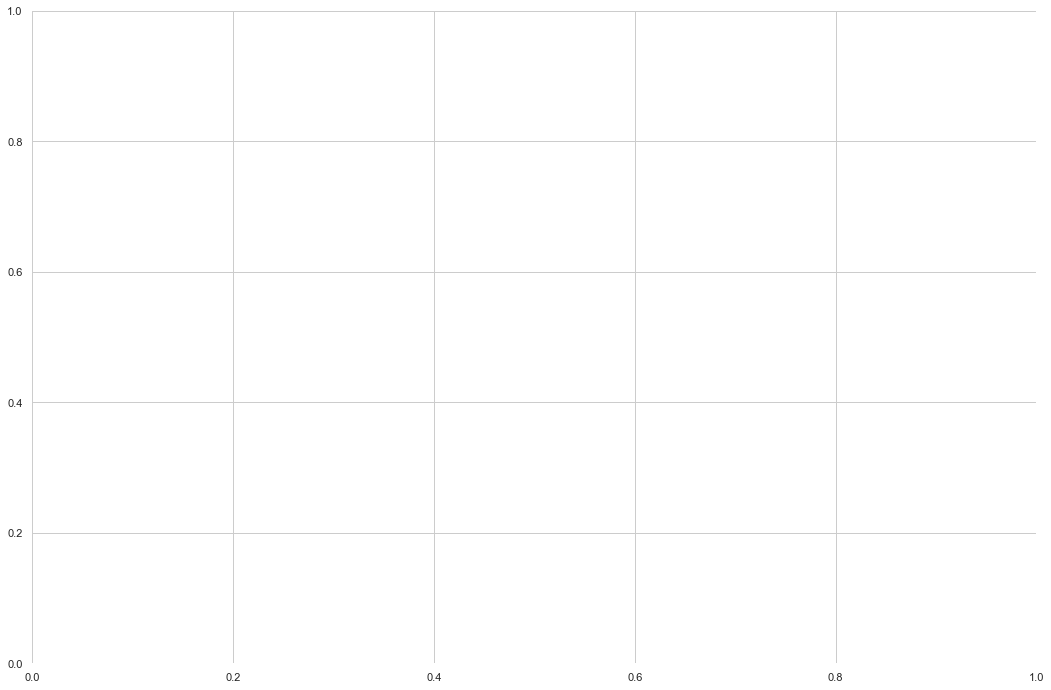

In [61]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("bright")

f, ax = plt.subplots(figsize=(18, 12))
sns.despine(f, left=True, bottom=True)
sns.barplot(x="zipcode", y="price_sqft", data=df, ax=ax)
ax.set_title("Price Per Square Foot by Zip Code", fontsize=15,fontweight='bold')
ax.set_xlabel("Zip Code", fontsize=12,fontweight='bold')
ax.set_ylabel("Price per Square Foot of Living Space", fontsize=12,fontweight='bold')
plt.xticks(rotation=90)

plt.show()

In [ ]:
df[df['zip_98039']==1].mean()

In [ ]:

# Draw Seaborn Scatter Plot to find relationship between age and fare
sns.scatterplot(data=df, x = df['grade'], y = df['price'], hue='waterfront')

In [62]:
df['price'].max()

2450000.0

# Write csv
# With to_csv

In [65]:
df.to_csv("kc_house_data_for_all_transformed_data.csv")

In [66]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,1,0,0,0,0,0,0,0,0,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
